# 0. Install and Import dependencies

In [1]:
pip install gym-anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 KB 5.3 MB/s eta 0:00:00


In [2]:
pip install stable-baselines3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=be0e7a7965fb4353998431c302de873f62b987aa40348fde9d32658cc21a496f
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.0.0
    Uninstalling importlib-metadata-6.0.0:
      Successfully uninstalled importlib-metadata-6.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import gym

# from stable_baselines3 import A2C
# from stable_baselines3.common.env_util import make_vec_env

# # Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

# model = A2C("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=25000)
# model.save("a2c_cartpole")

# del model # remove to demonstrate saving and loading

# model = A2C.load("a2c_cartpole")

# obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = env.step(action)
#     env.render()

In [5]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines3 import A2C
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
import os

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch AAPL Data 
https://www.marketwatch.com/investing/stock/aapl

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DELE_CA2/TechPaper/data/AAPL.csv')

In [73]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02/02/2023,148.90,151.18,148.17,150.82,"118,339,000"
1,02/01/2023,143.97,146.61,141.32,145.43,"77,663,633"
2,01/31/2023,142.70,144.34,142.28,144.29,"65,874,461"
3,01/30/2023,144.96,145.55,142.85,143.00,"64,015,273"
4,01/27/2023,143.16,147.23,143.08,145.93,"70,555,844"


In [74]:
df.tail()

,Date,Open,High,Low,Close,Volume
247,02/08/2022,171.73,175.35,171.43,174.83,"74,829,219"
248,02/07/2022,172.86,173.95,170.95,171.66,"77,251,203"
249,02/04/2022,171.68,174.10,170.68,172.39,"82,465,398"
250,02/03/2022,174.48,176.24,172.12,172.90,"89,418,070"
251,02/02/2022,174.75,175.88,173.33,175.84,"84,914,258"


In [75]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [76]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-02,148.90,151.18,148.17,150.82,"118,339,000"
2023-02-01,143.97,146.61,141.32,145.43,"77,663,633"
2023-01-31,142.70,144.34,142.28,144.29,"65,874,461"
2023-01-30,144.96,145.55,142.85,143.00,"64,015,273"
2023-01-27,143.16,147.23,143.08,145.93,"70,555,844"


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-02-02 to 2022-02-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


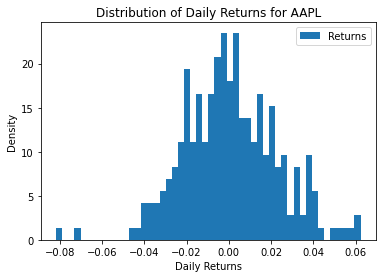

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
df['returns'] = df['Close'].pct_change()

# Plot daily returns
plt.hist(df['returns'], bins=50, density=True, label='Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns for AAPL')
plt.legend()
plt.show()

In [91]:
df['returns'].describe()

count    251.000000
mean       0.000859
std        0.022302
min       -0.081705
25%       -0.014518
50%        0.000000
75%        0.015450
max        0.062337
Name: returns, dtype: float64

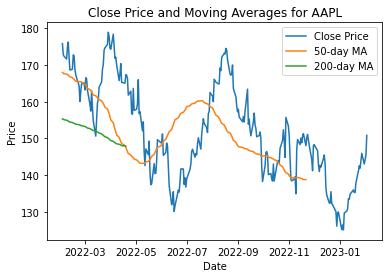

In [79]:

# Calculate moving average
df['50_ma'] = df['Close'].rolling(window=50).mean()
df['200_ma'] = df['Close'].rolling(window=200).mean()

# Plot Close price with moving averages
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['50_ma'], label='50-day MA')
plt.plot(df.index, df['200_ma'], label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages for AAPL')
plt.legend()
plt.show()


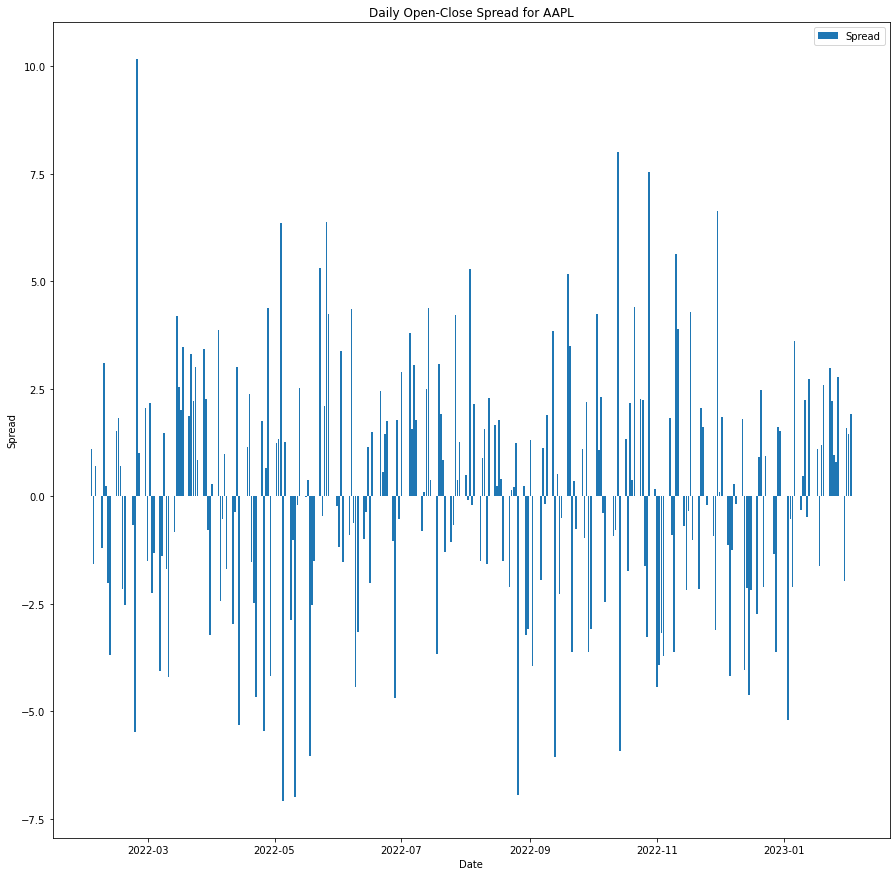

In [96]:
# Calculate daily open-Close spread
df['spread'] = df['Close'] - df['Open']

# Plot daily open-Close spread
plt.figure(figsize=(15,15))
plt.bar(df.index, df['spread'], label='Spread')

plt.xlabel('Date')
plt.ylabel('Spread')
plt.title('Daily Open-Close Spread for AAPL')
plt.legend()
plt.show()

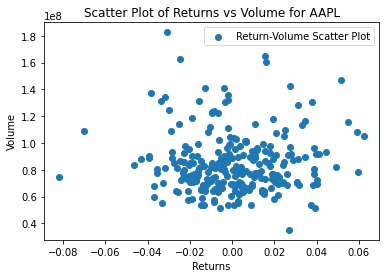

In [85]:
df['Volume'] = df['Volume'].str.replace(',','')

# Convert Volume to int
df['Volume'] = df['Volume'].astype(int)

# Calculate daily return-Volume correlation

# Plot daily return-Volume scatter plot
plt.scatter(df['returns'], df['Volume'], label='Return-Volume Scatter Plot')
plt.xlabel('Returns')
plt.ylabel('Volume')
plt.title('Scatter Plot of Returns vs Volume for AAPL')
plt.legend()
plt.show()

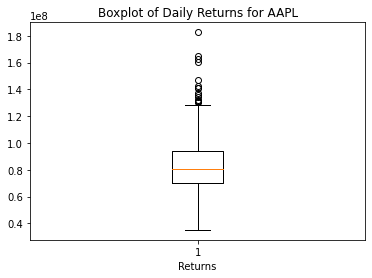

In [88]:
# Create a boxplot of Volume
plt.boxplot(df['Volume'])
plt.title("Boxplot of Daily Returns for AAPL")
plt.xlabel("Returns")
plt.show()

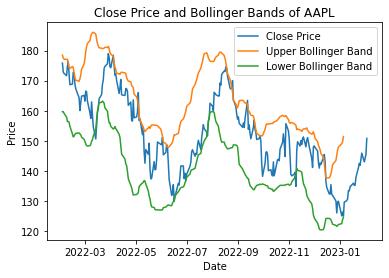

In [90]:
# Calculate the moving average and standard deviation of Close price over a 20-day window
df['ma_20'] = df['Close'].rolling(window=20).mean()
df['std_20'] = df['Close'].rolling(window=20).std()

# Calculate upper and lower Bollinger Bands
df['upper_band'] = df['ma_20'] + 2 * df['std_20']
df['lower_band'] = df['ma_20'] - 2 * df['std_20']

# Plot the Close price and Bollinger Bands
plt.plot(df['Close'], label='Close Price')
plt.plot(df['upper_band'], label='Upper Bollinger Band')
plt.plot(df['lower_band'], label='Lower Bollinger Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Bollinger Bands of AAPL')
plt.legend()
plt.show()





In [100]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [13]:
env.signal_features

array([[ 1.5082e+02,  0.0000e+00],
       [ 1.4543e+02, -5.3900e+00],
       [ 1.4429e+02, -1.1400e+00],
       [ 1.4300e+02, -1.2900e+00],
       [ 1.4593e+02,  2.9300e+00],
       [ 1.4396e+02, -1.9700e+00],
       [ 1.4186e+02, -2.1000e+00],
       [ 1.4253e+02,  6.7000e-01],
       [ 1.4111e+02, -1.4200e+00],
       [ 1.3787e+02, -3.2400e+00],
       [ 1.3527e+02, -2.6000e+00],
       [ 1.3521e+02, -6.0000e-02],
       [ 1.3594e+02,  7.3000e-01],
       [ 1.3476e+02, -1.1800e+00],
       [ 1.3341e+02, -1.3500e+00],
       [ 1.3349e+02,  8.0000e-02],
       [ 1.3073e+02, -2.7600e+00],
       [ 1.3015e+02, -5.8000e-01],
       [ 1.2962e+02, -5.3000e-01],
       [ 1.2502e+02, -4.6000e+00],
       [ 1.2636e+02,  1.3400e+00],
       [ 1.2507e+02, -1.2900e+00],
       [ 1.2993e+02,  4.8600e+00],
       [ 1.2961e+02, -3.2000e-01],
       [ 1.2604e+02, -3.5700e+00],
       [ 1.3003e+02,  3.9900e+00],
       [ 1.3186e+02,  1.8300e+00],
       [ 1.3223e+02,  3.7000e-01],
       [ 1.3545e+02,

# 2. Build Environment

In [14]:
env.action_space

Discrete(2)

info {'total_reward': -4.05000000000004, 'total_profit': 0.48737541438228066, 'position': 1}


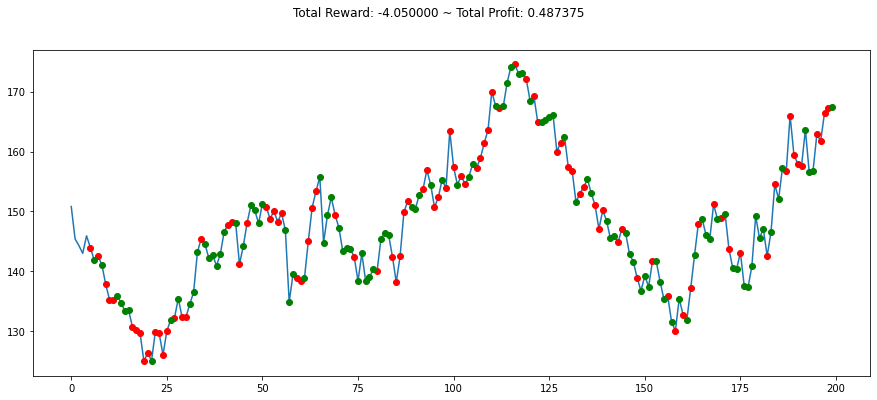

In [101]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward,done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [98]:
print(state)

[[145.43  -5.39]
 [144.29  -1.14]
 [143.    -1.29]
 [145.93   2.93]
 [143.96  -1.97]]


# 3. Build Environment and Train

In [123]:
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)
custom_env =  gym.make('stocks-v0', df=df, frame_bound=(5,230), window_size=5)
env=Monitor(custom_env,log_dir)
# env = make_vec_env(env_maker)

In [117]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

print()
print("custom_env information:")
print("> shape:", custom_env.shape)
print("> df.shape:", custom_env.df.shape)
print("> prices.shape:", custom_env.prices.shape)
print("> signal_features.shape:", custom_env.signal_features.shape)
print("> max_possible_profit:", custom_env.max_possible_profit())

env information:
> shape: (5, 2)
> df.shape: (252, 13)
> prices.shape: (230,)
> signal_features.shape: (230, 2)
> max_possible_profit: 7.64851572651169

custom_env information:
> shape: (5, 2)
> df.shape: (252, 13)
> prices.shape: (230,)
> signal_features.shape: (230, 2)
> max_possible_profit: 7.64851572651169


In [97]:
# model = A2C("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=10_000)


# obs = env.reset()
# while True:
#     action, _states = model.predict(obs)
#     obs, rewards, dones, info = env.step(action)
#     env.render()

In [124]:
model = A2C('MlpPolicy', custom_env, verbose=1) 
model.learn(total_timesteps=110000)





Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 224       |
|    ep_rew_mean        | 5.86      |
| time/                 |           |
|    fps                | 692       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.683    |
|    explained_variance | -0.000625 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0.168    |
|    value_loss         | 0.0884    |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 224      |
|    ep_rew_mean        | 3.88     |
| time/                 |          |
|    fps                | 699      |
|    iterations         | 200      |
|

# 4. Evaluation

In [130]:
env = gym.make('stocks-v0', df=df, frame_bound=(220,252), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 4.9199999999999875, 'total_profit': 0.9715747154422754, 'position': 0}


In [39]:
# vec_env = model.get_env()
# obs = vec_env.reset()
# for i in range(1000):
#     action, _states = model.predict(obs, )
#     obs, rewards, dones, info = vec_env.step(action)
#     vec_env.render()
#     plt.show()

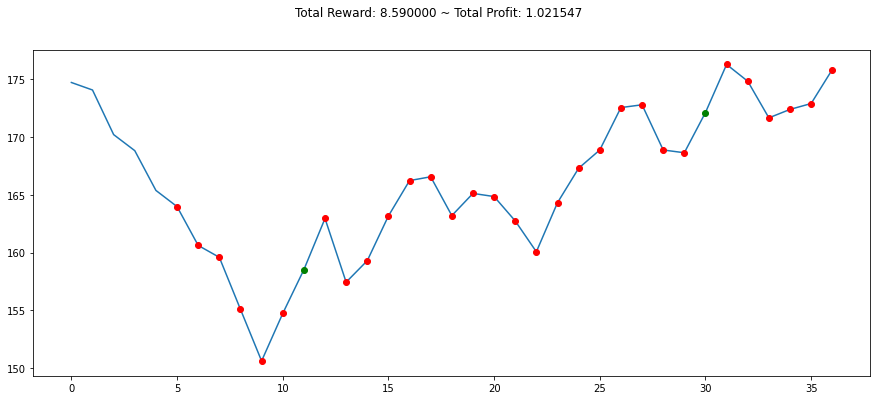

In [128]:
plt.figure(figsize=(15,6))

plt.cla()
env.render_all()
plt.show()